In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import json
from bs4 import BeautifulSoup
import requests
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import datasets, linear_model
import numpy as np

C:\Users\Samuel\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def arrumapreco(valor):  #função que retira todos os sinais(emocotions continuam)
    if "M" in valor:
        valor=valor.replace("M","000000")
        valor=valor.replace("€","")
        if "." in valor:
            valor=valor.replace(".","")
            return int(valor)/10000000
        else:
            return int(valor)/1000000
    
    else:
        valor=valor.replace("K","000")
        valor=valor.replace("€","")
        if "." in valor:
            valor=valor.replace(".","")
            return int(valor)/1000000
        else:
            return int(valor)/1000000

def arrumaatt(att):
    if type(att) !=int:
        if "+" in att:
            att=att[:att.find("+")]
        elif "-" in att:
            att=att[:att.find("-")]
    return att

def arrumapos(pos):
    return pos.split()[0]



In [3]:
#Inicializa os datasets e arruma seus valores
df=pd.read_csv('Database\CompleteDataset.csv',index_col=0)
listtwitter = json.loads(open("followers.txt").read())
dft=pd.DataFrame(listtwitter,columns=["Name","Seguidores","Twitter"])
dfall = df.merge(dft, how = 'inner', on = ['Name'])
dfall=dfall.dropna()
dfall["index"]=dfall.index


features=["Acceleration","Agility","Ball control","Dribbling","Long shots","Marking","Reactions","Short passing","Shot power","Sliding tackle","Stamina","Strength","Volleys"]
features=["Acceleration","Aggression","Crossing","Dribbling","Finishing","Jumping","Long shots","Reactions","Strength"]
features2=features+["Followers"]

dfall=dfall.rename(columns = {'Preferred Positions':'Positions'})
dfall.Value=dfall.Value.apply(arrumapreco)

dfall=dfall[(dfall.Value>1)]
dfall=dfall[(dfall.Positions == 'ST LW ') | (dfall.Positions == 'RW ') | (dfall.Positions == 'LW ') | (dfall.Positions == 'ST ')| (dfall.Positions == 'CF ')| (dfall.Positions == 'ST RW ')| (dfall.Positions == 'CAM ')]

for i in features:
    dfall[i]=dfall[i].apply(arrumaatt)
    
#dfall

C:\Users\Samuel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
X = dfall[features]
X2 = pd.concat([dfall[features],dfall.Seguidores],axis=1)

y = dfall.Value

X_train, X_test, y_train, y_test = train_test_split(X[10:], y[10:], test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2[10:], y[10:], test_size=0.1, random_state=42)


X = dfall[features]
X2 = pd.concat([dfall[features],dfall.Seguidores],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.1, random_state=42)





In [5]:
regr = linear_model.LinearRegression()# cria o modelo
regr2 = linear_model.LinearRegression()

regr.fit(X_train, y_train) # treina o modelo
regr2.fit(X_train2, y_train2) # treina o modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

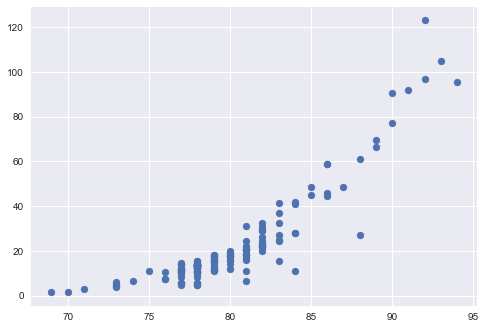

In [6]:
plt.scatter(dfall.Overall,dfall.Value)
plt.show()

In [7]:
#OLS
yy = y_train
XX = X_train
XX = sm.add_constant(XX)

model = sm.OLS(yy, XX.astype(float)).fit()
print(model.summary())

#OLS
yy2 = y_train2
XX2 = X_test2
XX2 = sm.add_constant(XX)

model2 = sm.OLS(yy2, XX2.astype(float)).fit()
print()

print(model2.summary())



                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     47.81
Date:                Tue, 21 Nov 2017   Prob (F-statistic):           1.87e-36
Time:                        19:18:52   Log-Likelihood:                -507.43
No. Observations:                 136   AIC:                             1035.
Df Residuals:                     126   BIC:                             1064.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -306.2490     19.184    -15.963   

In [8]:
estim = regr.predict(X_test)
aux=X_test.copy()
aux["index"]=aux.index
aux['Valor Estimado']=estim
list_index=X_test.index

dfresult=dfall.merge(aux, how = 'left', on = ['index']).dropna()


estim2 = regr2.predict(X_test2)
aux2=X_test2.copy()
aux2["index"]=aux2.index
aux2['Valor Estimado Twitter']=estim2
list_index2=X_test2.index

dfresult=dfresult.merge(aux2, how = 'left', on = ['index'])
print("Tabela com valores do dataset de teste:")
dfresult=dfresult.rename(columns = {'Seguidores_y':'Seguidores'})
dfresult[["Name","Value","Valor Estimado","Valor Estimado Twitter","Seguidores"]]


Tabela com valores do dataset de teste:


,Name,Value,Valor Estimado,Valor Estimado Twitter,Seguidores
0,P. Aubameyang,61.0,58.707105,55.172576,741565
1,H. Kane,59.0,47.706205,46.009648,1276425
2,K. Benzema,44.5,41.834027,42.357226,7268649
3,M. Icardi,42.0,32.463353,30.999380,1245512
4,Morata,41.0,38.671196,37.413549,4036246
5,B. Dost,27.0,28.226058,30.834371,5684846
6,S. Rondón,16.0,12.563312,14.172213,2531388
7,F. Smolov,17.5,24.137357,24.225484,29503
8,Zé Luís,15.5,21.120943,20.638766,20602
9,O. Al Soma,10.5,19.707629,19.624805,1051631


In [9]:
estim_all=regr.predict(X)
estim_all_twitter=regr2.predict(X2)
dfall["Estim"]=estim_all
dfall["Estim Twitter"]=estim_all_twitter

print("Tabela com dataset completo com valores previstos")
dfall[["Name","Estim","Value","Estim Twitter","Seguidores"]]

Tabela com dataset completo com valores previstos


,Name,Estim,Value,Estim Twitter,Seguidores
0,Cristiano Ronaldo,83.378682,95.5,97.497597,64104546
1,L. Messi,97.090746,105.0,92.986383,1424743
2,Neymar,71.140914,123.0,80.045160,35163756
3,L. Suárez,74.315805,97.0,75.099497,12380660
5,R. Lewandowski,63.906607,92.0,61.273192,981411
7,E. Hazard,63.160662,90.5,62.385535,5168450
9,G. Higuaín,63.813504,77.0,62.326986,6722354
16,G. Bale,62.611359,69.5,63.039865,15693471
17,S. Agüero,68.191624,66.5,68.674616,12496406
24,P. Aubameyang,58.707105,61.0,55.172576,741565
